In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
from scipy import stats
from scipy import optimize
import urllib.request
import seaborn as sns
plt.style.use('dark_background')

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

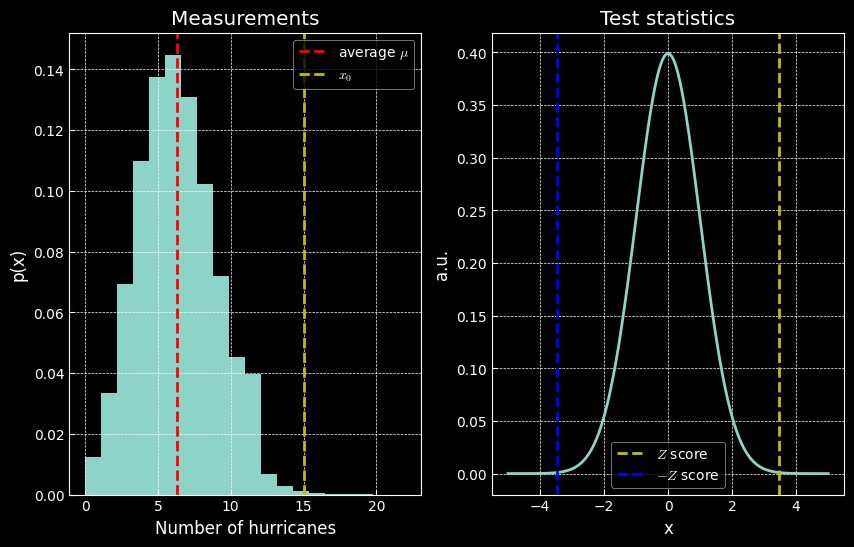

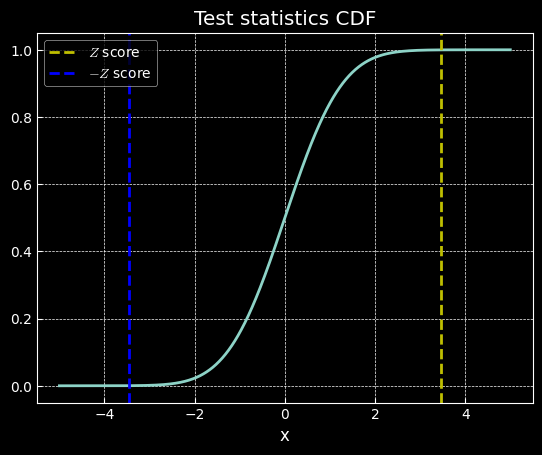

Z score = 3.5
p-value1 (for Z = 3.5 ) = 0.0005
p-value2 (for Z = 3) = 0.0027 

Comparing the two p-values, we can see that the first p-value (pvalue_1) is smaller than the second p-value (pvalue_2), which means that the first test provides stronger evidence against the null hypothesis. This suggests that the number of hurricanes in 2005 (15) is even more unlikely to be due to chance compared to if we were considering a Z-score threshold of 3.


<Figure size 640x480 with 0 Axes>

In [75]:
x0 = 15
mu = 6.3
sigma_mu = np.sqrt(mu)

# plot the measurement and its assumed pdf
x = stats.poisson.rvs(mu=mu, loc=0, size=1000000)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
ax1.hist(x, bins=20, density=True)
ax1.axvline(mu, linestyle='--', color='r', label=r'average $\mu$')
ax1.axvline(x0, linestyle='--', color='y', label=r'$x_0$')
ax1.set_title("Measurements")
ax1.set_xlabel('Number of hurricanes')
ax1.set_ylabel("p(x)")
ax1.legend()

#Z score
Z = abs(x0-mu)/sigma_mu

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.norm.pdf(xs)
ax2.plot(xs, ts)
ax2.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
ax2.axvline(Z, linestyle='--', color='y', label=r'$Z$ score')
ax2.axvline(-Z, linestyle='--', color='b', label=r'$-Z$ score')
ax2.set_title("Test statistics")
ax2.set_ylabel("a.u.")
ax2.set_xlabel("x")
ax2.legend()
plt.show()

# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='y', label=r'$Z$ score')
plt.axvline(-Z, linestyle='--', color='b', label=r'$-Z$ score')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.legend()
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue_Z3 = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print('Z score = %.1f' %Z)
print('p-value1 (for Z = %.1f' %Z, ') = %.4f' %pvalue)
print('p-value2 (for Z = 3) = %.4f' %pvalue_Z3, '\n')

print('Comparing the two p-values, we can see that the first p-value (pvalue_1) is smaller than the second p-value (pvalue_2), which means that the first test provides stronger evidence against the null hypothesis. This suggests that the number of hurricanes in 2005 (15) is even more unlikely to be due to chance compared to if we were considering a Z-score threshold of 3.')
plt.tight_layout()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

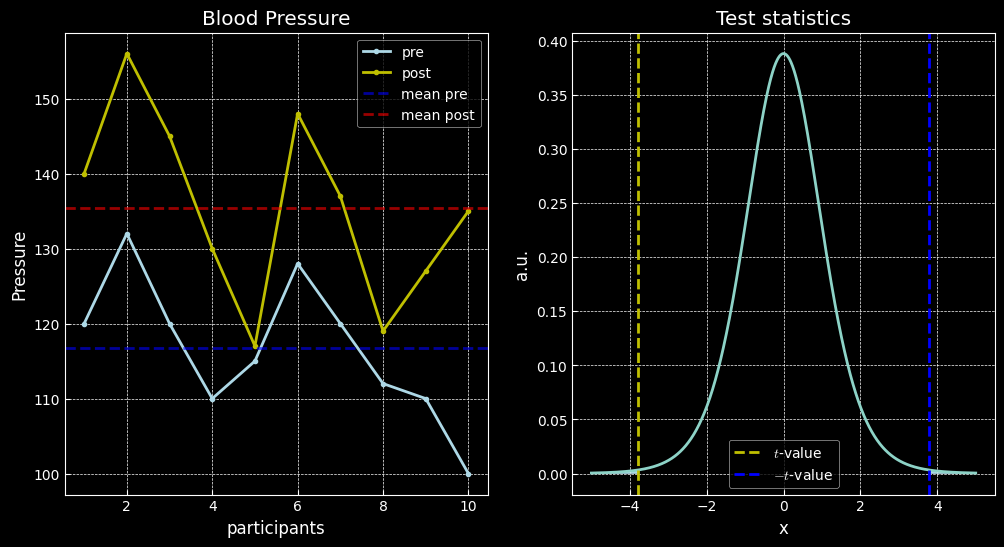

t-value = -3.8
p-value = 0.004
α = 0.05 

Since p-value < α, we reject the null hypotesis: the change in blood pressures within our sample is statistically significant.


<Figure size 640x480 with 0 Axes>

In [76]:
# inputs
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre) 
participants = np.array([i for i in range(1,n+1)])

# mean of the sample
mu1 = np.mean(pre)
mu2 = np.mean(post)
# calculate the variance and its sqrt()
σ1 = np.sqrt(np.var(pre, ddof=1))
σ2 = np.sqrt(np.var(post, ddof=1))

# plot the measurents
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.set_title('Blood Pressure')
ax1.plot(participants, pre, marker='.', c='lightblue', label='pre')
ax1.plot(participants, post, marker='.', c='y', label='post')
ax1.axhline(mu1, linestyle='--', color='b', alpha=0.6, label='mean pre')
ax1.axhline(mu2, linestyle='--', color='r', alpha=0.6, label='mean post')
ax1.legend(loc='best')
ax1.set_xlabel('participants')
ax1.set_ylabel('Pressure')

# test statistics
σ = np.sqrt((σ1**2+σ2**2)/2)
tvalue = (mu1-mu2)/(σ*np.sqrt(2/n))

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n-1)
ax2.plot(xs, ts)
ax2.fill_between(xs, ts, where=np.abs(xs)>np.abs(tvalue), color='lightblue')
ax2.axvline(tvalue, linestyle='--', color='y', label=r'$t$-value')
ax2.axvline(-tvalue, linestyle='--', color='b', label=r'$-t$-value')
ax2.set_title("Test statistics")
ax2.set_ylabel("a.u.")
ax2.set_xlabel("x")
ax2.legend(loc='best')
plt.show()
plt.tight_layout()
# calculate the p-value
pvalue = stats.t.cdf(tvalue, n-1) + (1. - stats.t.cdf(-tvalue, n-1))
α = 0.05

print('t-value = %.1f' %tvalue)
print("p-value = %.3f" %pvalue)
print('α =', α,'\n')

if pvalue < α:
    print('Since p-value < α, we reject the null hypotesis: the change in blood pressures within our sample is statistically significant.')
else:
    print('Since p-value > α, we accept the null hypotesis: the change in blood pressures within our sample isnt statistically significant.')

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The best-fit values of the parameters are for the minimum temperature : 
a = -25.149619882363304 
b = 0.6013209320472775 
c = 1.024490849597641 
d = -36.71256482735937 

The best-fit values of the parameters are for the maximum temperature : 
a = 10.581699539132542 
b = 0.5922742374215393 
c = 4.46452954345335 
d = 27.9496353469477 

The overall average of minimum temperature is: -39.7 °C

The overall average of maximum temperature is: 26.8 °C

The minimum temperature of the year is:  -61.82 °C

The hottest temperature of the year is: 38.39 °C


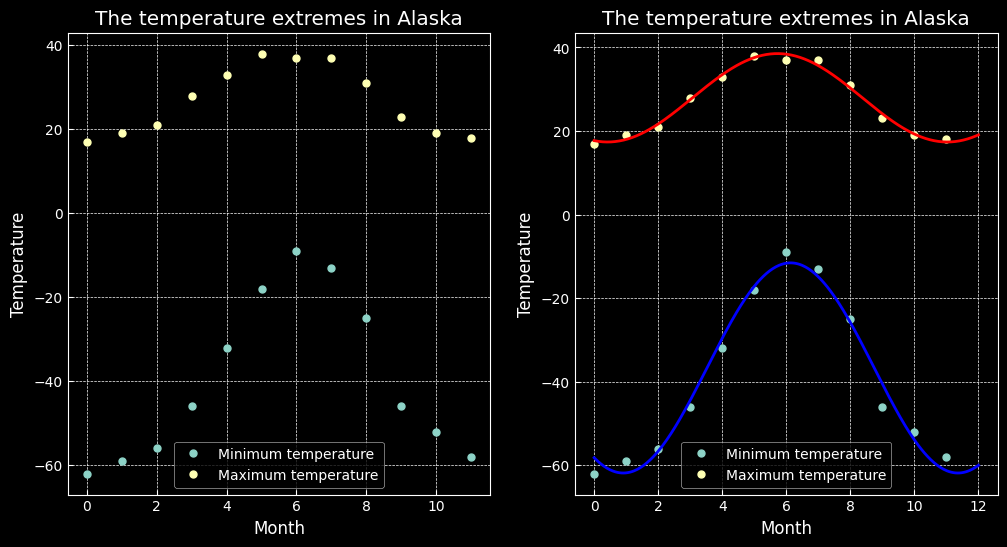

In [77]:
# input data
T_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
T_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(12)

# Plot temperatures.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(months, T_min, '.', months, T_max,'.', markersize=10)
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.set_title('The temperature extremes in Alaska')
ax1.legend(['Minimum temperature','Maximum temperature' ], loc='best')

def cos(t, a,b,c,d):
    return a * np.sin(b * t + c) + d

params_max, cov_max = optimize.curve_fit(cos, months,T_max, [ 10, 1,0,20])
params_min, cov_min = optimize.curve_fit(cos, months,T_min, [30,1, 0,-40])

days = np.linspace(0, 12, num=365)

ax2.plot(months, T_min, '.', months, T_max,'.', markersize=10)

ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature')
ax2.set_title('The temperature extremes in Alaska')
ax2.legend(['Minimum temperature','Maximum temperature' ], loc='best')

ax2.plot(days, cos(days, *params_max), 'r-')
ax2.plot(days, cos(days, *params_min), 'b-')

print('The best-fit values of the parameters are for the minimum temperature : \na = {} \nb = {} \nc = {} \nd = {} '.format(*params_min))
print('\nThe best-fit values of the parameters are for the maximum temperature : \na = {} \nb = {} \nc = {} \nd = {} '.format(*params_max))
print('\nThe overall average of minimum temperature is: {:1.1f} °C'.format(np.mean(T_min)))
print('\nThe overall average of maximum temperature is: {:1.1f} °C'.format(np.mean(T_max)))
print('\nThe minimum temperature of the year is:  {:.2f} °C'.format( cos(months, *params_min).min()))
print('\nThe hottest temperature of the year is: {:.2f} °C'.format(cos(months, *params_max).max()))

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

<AxesSubplot: xlabel='residuals', ylabel='Count'>

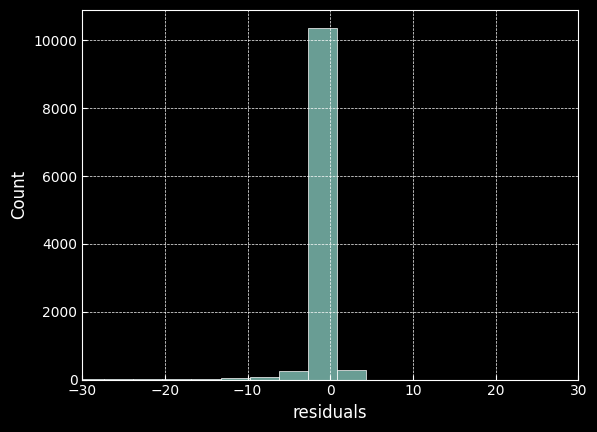

In [78]:
df = np.load("data/residuals_261.pkl",allow_pickle=True).item()
df = pd.DataFrame(data,columns=['residuals','distances'])

fig, ax = plt.subplots()
x = df['residuals']
ax.set_xlim(-30,30)
sns.histplot(x, bins=np.linspace(x.min(), x.max()))


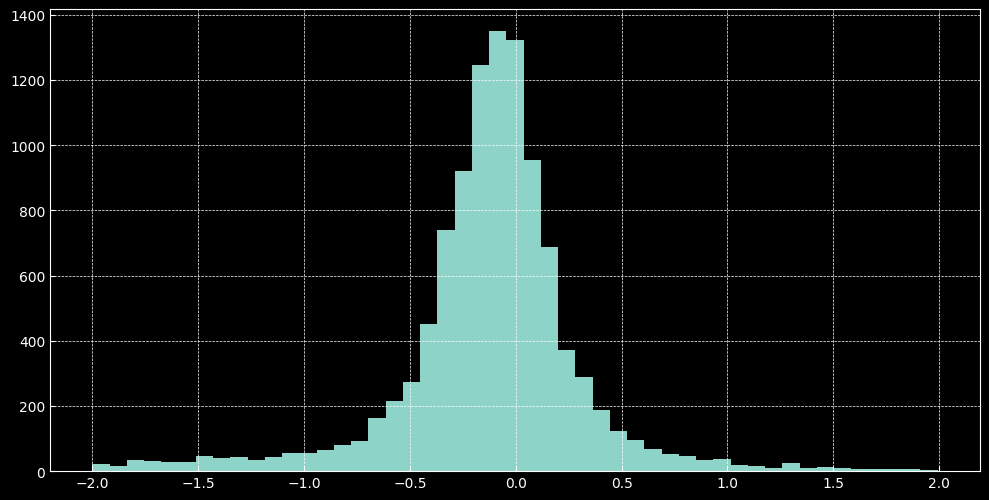

In [79]:
# Filtter data  to be better understood
x = data.loc[(data['residuals'] > -2) & (data['residuals'] < 2)]['residuals']
plt.figure(figsize=(12,6))
y,bins,_ =plt.hist(x, bins=np.linspace(x.min(), x.max()))

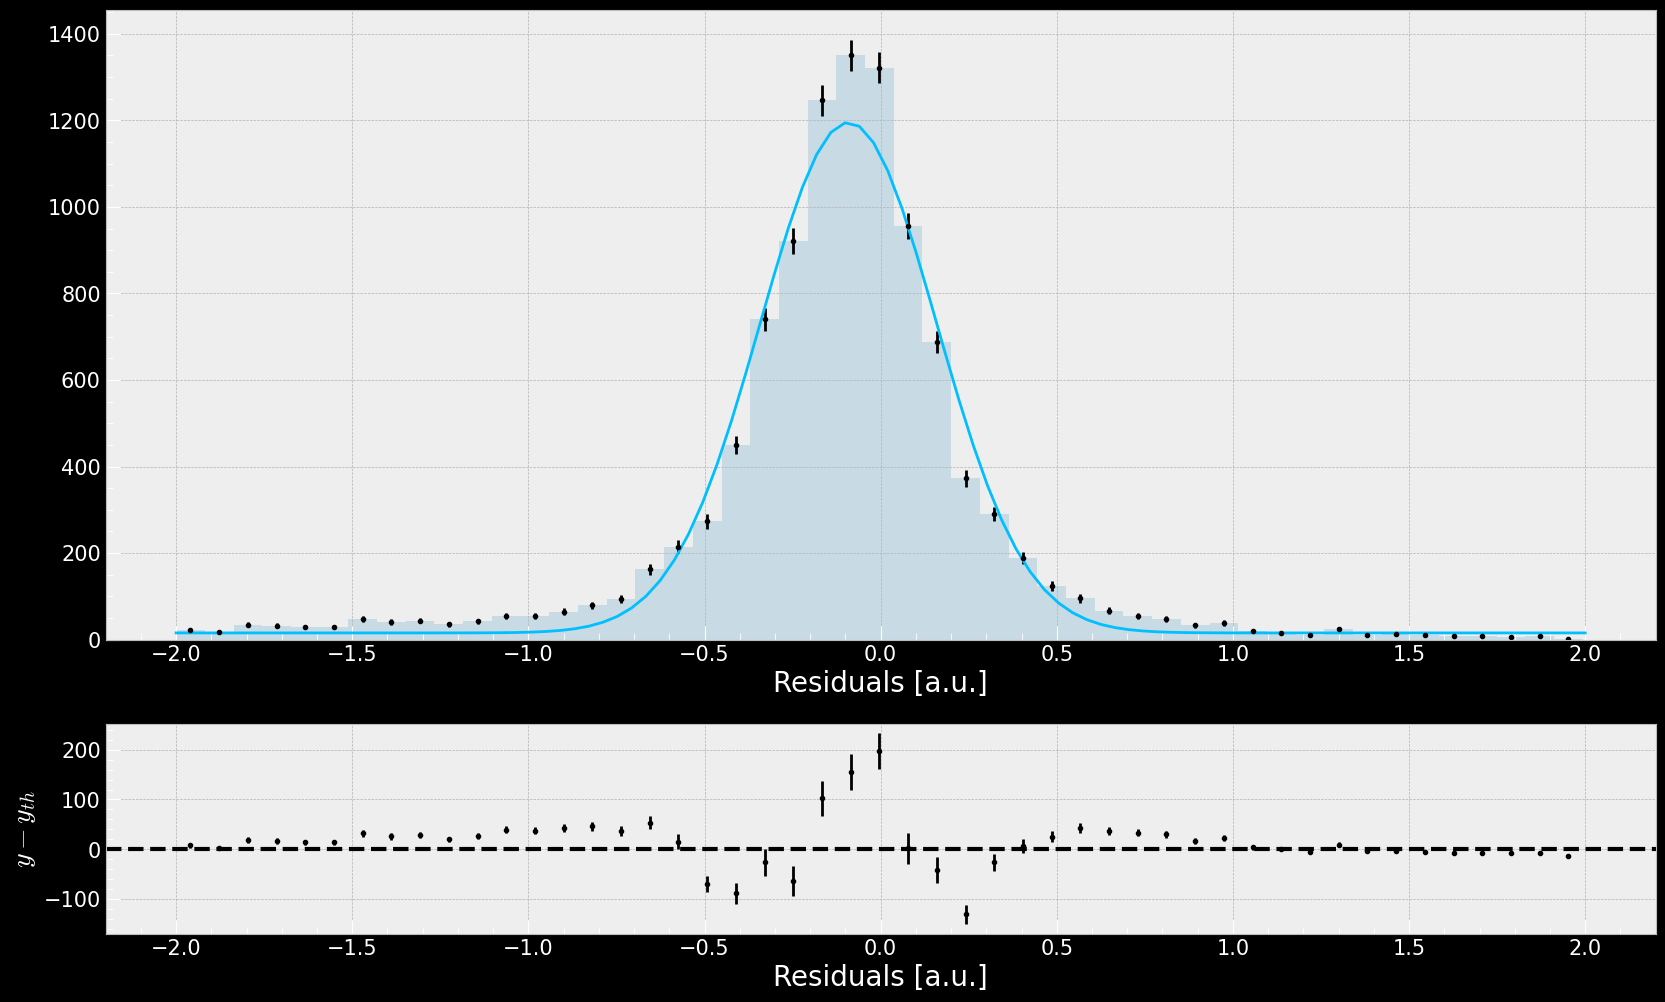

In [80]:
plt.style.use('bmh')
gauss = lambda x, a, mu, sigma,b : a*stats.norm.pdf(x, mu, sigma)+ b

# bin centers
bin_centers = 0.5*(bins[1:]+bins[:-1])

# set Poisson uncertainty for each bin   
poisson_err =  np.sqrt(np.abs(y))

# curve fitting 
par, cov = optimize.curve_fit(gauss,xdata = bin_centers, ydata = y, sigma = poisson_err) 

# ploting the results
r = np.linspace(-2,2,100)
fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

ax1.hist(x, bins=np.linspace(x.min(), x.max()), alpha = 0.2)
ax1.errorbar(bin_centers, y, yerr = poisson_err, fmt='.k', label = 'Estimated Error')
ax1.plot(r, gauss(r,*par), color = 'deepskyblue', label = 'Gaussian Fitted curve')

y_th = gauss(bin_centers, *par)
residual = y - y_th

ax2.errorbar(bin_centers, residual, yerr = poisson_err, fmt='.k')
ax2.axhline(color = 'black', linewidth = 3, linestyle = '--')
ax2.set_ylabel('$y-y_{th}$', fontsize = 20) 

for ax in fig.get_axes():
    ax.set_xlabel('Residuals [a.u.]', fontsize = 20)                             
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()


In [81]:
ssr = np.sum((residual)**2)
tss = np.sum((np.mean(n) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(bin_centers,y)) 

# set the number of degrees of freedom
ndof = len(y) - 1
print("n degrees of freedom =", ndof)

# calculate the chi2
sigma_y = np.sqrt(np.abs(y))
chi2 =np.sum(((residual)**2) / sigma_y)
print("chi2 =", chi2)

# calculate the p-value
p_value = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", p_value)

# Significance level
α = 0.05 

if p_value <= α:
    print("Since the p-value is  < α , the fit is considered unsatisfactory")
else:
    print("Since the p-value is > α , the fit is considered satisfactory")

R2 = 0.9840642247026703 
R = 0.9920001132573878
Covariance matrix:
 [[ 1.         -0.06109374]
 [-0.06109374  1.        ]]
n degrees of freedom = 48
chi2 = 6887.492847596126
p-value = 0.0
Since the p-value is  < α , the fit is considered unsatisfactory


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [82]:
# Load the data
url = "https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt?dl=1"
webURL = urllib.request.urlopen(url)
df1 = pd.read_csv(webURL, names=['Time','Temperature'], delimiter=" ")
# selecting the samples which have time between 2008 to 2012
df2 = df1.loc[df1['Time'].between(2008, 2012, inclusive='both')].copy()
df2.head()

,Time,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444



Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 12.33 +- 0.02
c = 9.4 +- 0.1 

Average temperature from the fit function parameters: c = 9.38411486809072 C˚
Minimum temperature from the fit function parameters: c-a = 19.372248557225234 C˚
Maximum temperature from the fit function parameters: c+a = -0.6040188210437964 C˚

Minimum temperature from the minimization of the fit function: -0.6040188210437964 C˚
Maximum temperature from the maximization of the fit function: 19.37224855722517 C˚


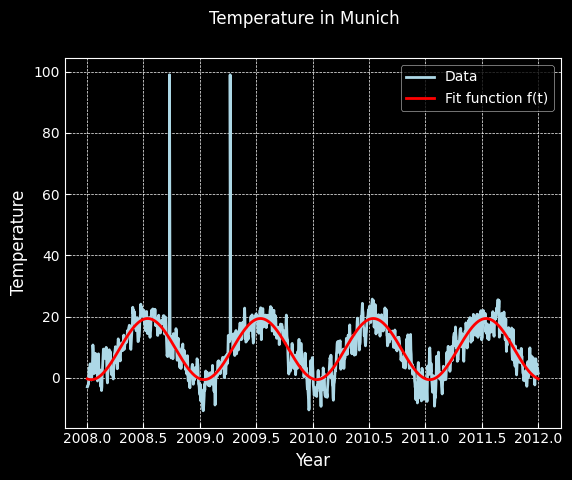

In [83]:
plt.style.use('dark_background')
# Define the fit function f(t)
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Use curve_fit to find the best-fit parameters
popt_f, pcov_f = optimize.curve_fit(f, df2['Time'],df2['Temperature'])

# Print of the best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_f[0], np.sqrt(pcov_f[0,0])))
print("b = %.2f +- %.2f" % (popt_f[1], np.sqrt(pcov_f[1,1])))
print("c = %.1f +- %.1f" % (popt_f[2], np.sqrt(pcov_f[2,2])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, f(t_range,*popt_f), c='red', label='Fit function f(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='best')

print('Average temperature from the fit function parameters: c =', popt_f[2],'C˚')
print('Minimum temperature from the fit function parameters: c-a =', popt_f[2]-popt_f[0],'C˚')
print('Maximum temperature from the fit function parameters: c+a =', popt_f[2]+popt_f[0],'C˚')

temp_min = optimize.minimize_scalar(lambda t: f(t, popt_f[0], popt_f[1], popt_f[2]))
temp_max = optimize.minimize_scalar(lambda t: -f(t, popt_f[0], popt_f[1], popt_f[2]))

print('\nMinimum temperature from the minimization of the fit function:', temp_min['fun'],'C˚')
print('Maximum temperature from the maximization of the fit function:', -1*temp_max['fun'],'C˚')

The variable "b" is the phase offset of the function. It represents the amount by which the function is shifted along the x-axis. This value can be positive or negative and determines the location of the function relative to the y-axis. It can also be thought of as the starting point of the function along the x-axis. The unit of "b" is radians.</br>
The variable "b" would not have a direct physical meaning. It represents a phase offset, or a shift along the x-axis, which does not have a direct correlation to temperature. However, it could be used to model a scenario where the temperature is affected by an external factor that causes it to shift in time, such as the rotation of the Earth relative to the sun (day and night cycles). In this case, the value of c could be used to represent the phase shift caused by this external factor.


Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 1.001 +- 0.003
c = -6 +- 32
d = 9.4 +- 0.1 



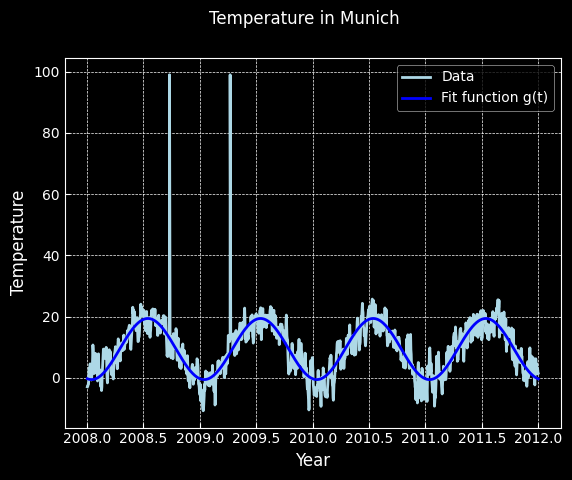

In [84]:
# g(t)
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

# curve_fit for finding the best-fit parameters
popt_g, pcov_g = optimize.curve_fit(g, df2['Time'],df2['Temperature'])

# Best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_g[0], np.sqrt(pcov_g[0,0])))
print("b = %.3f +- %.3f" % (popt_g[1], np.sqrt(pcov_g[1,1])))
print("c = %.0f +- %.0f" % (popt_g[2], np.sqrt(pcov_g[2,2])))
print("d = %.1f +- %.1f" % (popt_g[3], np.sqrt(pcov_g[3,3])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, g(t_range,*popt_g), c='blue', label='Fit function g(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='best')

In [85]:
# define α
α = 0.05

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < α else "NO")
    return pval

# RRS calculation
ssr_f = np.sum((df2['Temperature'] - f(df2['Time'],*popt_f))**2)
ssr_g = np.sum((df2['Temperature'] - g(df2['Time'],*popt_g))**2)
print('RSS of the fit f(t) =', ssr_f)
print('RSS of the fit g(t) =', ssr_g,'\n')

# run F-test: f(t) vs g(t)
ndof_f = 2
ndof_g = 3
N = len(df2['Temperature'])
print('F-test f(t) vs g(t):')
cl_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)

RSS of the fit f(t) = 34359.85859996652
RSS of the fit g(t) = 34352.79405393762 

F-test f(t) vs g(t):
p-value: 0.584 , additional parameter necessary: NO
